# **Week 5 Lab Activities Introduction to Visualization**
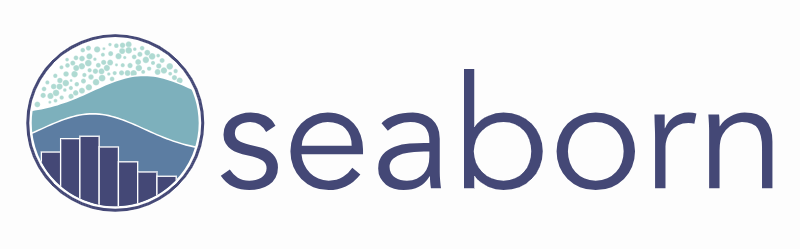

In [ ]:
# Week 6 Lab Activities - Business Data Analysis with Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import seaborn as sns



# **[Seaborn Website](https://seaborn.pydata.org/index.html)**

# **Seaborn Dependencies ** : Seaborn supports Python 3.8+. italicized text

#Installation requires numpy, pandas, and matplotlib.
# Some advanced statistical functionality requires scipy and/or statsmodels.

In [ ]:
# Titanic Dataset Exploration and Analysis - Lab Activities

# Introduction

# Dataset Overview: The Titanic dataset contains information about passengers
# who were aboard the Titanic when it sank in 1912. The dataset includes
# details such as passenger class, age, sex, fare, and survival status.


# Lab Objectives:
#Data Inspection and Cleaning: Learn how to inspect, clean, and preprocess data using basic pandas functions.

#Data Visualization: Create various types of plots (line, scatter, bar, histogram, pie) using Matplotlib to analyze and interpret the Titanic dataset.

# Interpretation: Understand when to use each type of plot and how to interpret the results.


# **Activity 1: Loading and inspecting data**

---



In [ ]:

# Load the dataset. Save your dataframe titanic_seaborn_df









#  Data set description
  PassengerId   A unique identifier assigned to each passenger.
  Survived Indicates whether the passenger survived (1) or not (0).
  Pclass  The passenger's class (1 = First Class, 2 = Second Class, 3 = Third Class).
  Name   The full name of the passenger.
  Sex  The gender of the passenger (male or female).
  Age   The age of the passenger. Some values are missing .
  SibSp   The number of siblings and spouses the passenger had aboard the Titanic.
  Parch   The number of parents and children the passenger had aboard the Titanic.
  Ticket  The ticket number assigned to the passenger.
  Fare   The fare amount paid by the passenger.
  Cabin  The cabin number assigned to the passenger.
  Embarked  The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).

In [ ]:

# Display first few rows

In [ ]:
#Check the dimensions, data types, and summary statistics

# Get the dimensions of the dataset


In [ ]:

# Get information about data types and missing values


In [ ]:


# Get summary statistics for numerical columns





In [ ]:
# Get summary statistics for categorical columns


In [ ]:
#Get last 7 rows of the dataframe

titanic_seaborn_df.tail(7)

In [ ]:
#select/filter column by type
titanic_seaborn_df.select_dtypes(include=['object'])

In [ ]:
#Calculate the frequency of total value count in a column survived



In [ ]:

# Calculate the value_count in the gender column


In [ ]:
#Conditional Filtering
#Use boolean indexing to inspect specific subsets:
# show the dataframe with only those who survived and belong to first class
titanic_seaborn_df[(titanic_seaborn_df['Survived'] == 1) & (titanic_seaborn_df['Pclass'] == 1)]


In [ ]:
#how many total number of passengers survived from 1st class?

In [ ]:
#.corr(): Correlation matrix (numerical columns)

titanic_seaborn_df[['Age',"Survived", "Fare"]].corr()

**How do you interpret it **

**Why there are double brackets in .corr command?**

In [ ]:
#Outer Square Brackets ([...]): These are used for indexing and selecting data from a Pandas DataFrame.
#Inner Square Brackets ([...]): These create a list containing the column names you want to select: "Age", "Survived", and "Fare". By enclosing them in a list (with square brackets), you're telling Pandas to select those specific columns as a subset of the DataFrame.
#Why not single brackets?

#If you use single brackets with multiple column names like titanic_seaborn_df['Age', 'Survived', 'Fare'], Pandas interprets this as attempting to access a single column with a tuple as its name ('Age', 'Survived', 'Fare'), which it won't find, resulting in the KeyError.

# **Activity 2: Identifying and Handling Missing Values**

---



In [ ]:
# Activity 2: Identifying and Handling Missing Values

# Count missing values per column
titanic_seaborn_df.isnull().sum()



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Visualize missing data
import missingno as msno
msno.matrix(titanic_seaborn_df)
plt.show()


# **What does above error shows and how to fix it.**

In [ ]:
# Impute missing values for 'Age' with the median
median_age = titanic_seaborn_df['Age'].median()
titanic_seaborn_df['Age'].fillna(median_age, inplace=True)

#The distribution of Age in the Titanic dataset is not perfectly normal;
#it likely has a right skew due to outliers (e.g., very elderly passengers).
#The mean is sensitive to outliers, meaning a few extremely high or low ages could pull the mean up or down,
# making it less representative of the majority of passengers.
#The median, being the middle value, is not affected by extreme values,
# making it a better representation of central tendency in skewed data



In [ ]:
# Drop the 'Cabin' column due to many missing values
# Drop irrelevant columns due to high missingness or redundancy
# What do you think what are the irrelvant columns here

titanic_seaborn_df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)



# Recheck for missing values
titanic_seaborn_df.isnull().sum()




**Why are we dropping column instead of filling it with mean or mode?**

In [ ]:
#1. Too Many Missing Values (~77%)
#Since most of the values are missing, filling them with a single value (like "Unknown")
# would not add much useful information to the dataset.
#Imputing missing values with a median, mode, or predictive model would introduce
# too much guesswork and potential bias.
#2. Limited Predictive Value for Survival Analysis
#While first-class passengers were more likely to have recorded cabins,
#the actual cabin number may not strongly influence survival rates.
#The Pclass column (Passenger Class) already provides a similar distinction (First Class, Second Class, Third Class).
#3. High Cardinality and Complexity
#The Cabin column contains a mix of numbers and letters, making it categorical and high-cardinality (many unique values).
#Some passengers share cabins, but this information is not consistently recorded.
#4. Data Cleaning Simplicity
#Removing the Cabin column simplifies data preprocessing and improves model performance
#by avoiding unnecessary complexity

In [ ]:
# impute embarked with mode

# Impute missing 'Embarked' values with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
#YOu can also use iloc as used in below code
#titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode().iloc[0], inplace=True)

# **Activity 3: Checking and Fixing Duplicates**

---



In [ ]:
# Activity 3: Checking and Fixing Duplicates

titanic_df.shape  #check the shape before removing

In [ ]:
#Checking and Fixing Duplicates
# Count duplicate rows
titanic_df.duplicated().sum()



In [ ]:
# Remove duplicate rows (if any)
titanic_df.drop_duplicates(inplace=True)
titanic_df.shape  # Check the shape after removal




# **Activity 4: Visuaizations-Statistical Relationships**

---



In [ ]:
#Exploring Relationships with relplot()

sns.relplot(
    data=titanic_seaborn_df,
    x='Age',
    y='Fare',
    hue='Survived',
    style='Sex',
    col='Pclass'
)
plt.show()

#Explanation:
#This multi-faceted plot examines the relationship between Age and Fare across different passenger classes (Pclass),
# with Survived indicated by color and Sex by marker style. It is useful for identifying patterns in survival related to age, fare, and class.




In [ ]:
#Task: Modify the plot: Change the facet (e.g., col='Embarked') and observe the differences in survival patterns based on embarkation port.


**How do you interpret above output**

In [ ]:
#1. **Correlation between Age and Fare:** Within each subplot (passenger class),
#you can observe whether there's a general positive or negative correlation between age and fare.
# For example, in some classes, you might see older passengers generally paying higher fares.
#2. **Survival Differences:**  You can look at how the colors (representing survival) are distributed within
#each subplot. For example, you might observe that within a certain age and fare range, a specific color (survival)
#is more prominent, suggesting a higher survival rate for that group.
#3. **Gender Differences:** You can compare the distributions of male and female passengers within each subplot
 #(indicated by marker styles). Are there significant differences in age-fare relationships based on gender?
#4. **Class Differences:** The key advantage of the `col='Pclass'` is that you can directly compare
#how the age-fare relationship varies across different classes.
#For example, you might see that first-class passengers tend to be older and have paid higher fares compared to third-class passengers.


# **Activity 5: KDE and Histplots**

---



In [ ]:

sns.displot(
  data=titanic_seaborn_df,
      x='Age',
    hue='Sex',
    kind='kde',
    col='Survived'
)
plt.show()
#Explanation: This plot shows the kernel density estimate (KDE) of Age for different genders and survival statuses.
#KDE plots are useful to understand the underlying distribution of a variable.


In [ ]:
#**Difference between `displot` with `kind='kde'` and `histplot`:**

#histplot :** Creates a histogram, which is a bar chart that shows the frequency distribution of a dataset.
#It counts the number of data points falling within each bin (or range) and displays it visually.
#**`displot` with `kind='kde'`:** Creates a KDE plot, which estimates the probability density function (PDF)
#of a continuous variable. It smooths out the data using a kernel function, producing a curve that represents the underlying distribution of the data.

# Summary:
# `histplot` shows the raw counts of data points in bins.
# `displot` with `kind='kde'` provides a smoothed estimate of the probability density, revealing the underlying distribution more clearly, particularly for continuous data.

#**When to use which:**

#histplot`:** When you want to visually inspect the frequency of data points within specific ranges or intervals.
#displot` with `kind='kde'`:** When you want to understand the overall shape and distribution of a continuous variable. It's especially useful for visualizing the density and identifying modes (peaks) in your data.

#In this example:**
#The `displot` with `kind='kde'` is displaying the probability density of Age, separated by gender and survival status.
#It provides a smoother visualization of the distributions compared to a histogram,
#allowing you to better compare the age distributions of males and females who survived or did not survive the Titanic disaster.

Now add the title KDE of Age for Different Genders and see how it looks like


In [ ]:
# Histogram with KDE for Age distribution, separated by Sex

#Task:
#Stacked Histogram: Create a stacked histogram for Fare distribution comparing survivors and non-survivors:

sns.histplot(
    data=titanic_seaborn_df,
    x='Fare',
    hue='Survived',
    multiple='stack'

)
plt.title("Fare Distribution by Survival Status")
plt.show()

#What is the issue with this chart. Is there ay issue affecting its visualization
# There is one outlier that changes the shape of the chart

## **Student Challenge**

In [ ]:
# Can you remove the outlier in Fare ?


# **Activity 6: Categorical Plots**

---



**Analyzing Categorical Data with catplot ()**

In [ ]:
sns.catplot(
    data=titanic_seaborn_df,
    x='Pclass',
    y='Age',
    hue='Survived,
    kind='box',
    col='Sex'
)
plt.show()
#This box plot visualizes the distribution of Age across different passenger classes and genders,
#segmented by survival. Box plots are helpful for comparing central tendencies and spread across categories.


**How to interpret above plot?**

**SWARM Plot**

In [ ]:
sns.catplot(
    data=titanic_seaborn_df,
    x='Pclass',
    y='Fare',
    hue='Survived',
    kind='swarm',
    palette='deep'
)
plt.title("Fare Distribution by Class and Survival")
plt.show()
#Swarm plots prevent overlap by arranging data points to show the distribution more clearly,
#which is useful when comparing groups.


In [ ]:
# Set a specific theme and palette
sns.set_theme(style="whitegrid", palette="coolwarm")
sns.relplot(
    data=titanic_seaborn_df,
    x='Age',
    y='Fare',
    hue='Survived',
    size='Pclass',
    sizes=(20, 200)
)


# **Activity 7: Object-Oriented API in Seaborn**

---



In [ ]:
from seaborn import objects as so

# Create an object-oriented plot
(so.Plot(titanic_seaborn_df, x='Age', y='Fare', color='Survived')
 .add(so.Dot())
 .facet(col='Pclass')
 .scale(color={0: 'red', 1: 'green'})
 .show())
#Explanation:
#The object-oriented API allows you to build plots step-by-step with method chaining.
#This approach offers more control over customization and is beneficial for creating complex,
#multi-faceted visualizations.


In [ ]:
# Let's break it down step-by-step:

# 1. `so.Plot(titanic_seaborn_df, x='Age', y='Fare', color='Survived')`:
#    - This initializes a plot object using `so.Plot` (Seaborn objects Plot).
#    - It takes the `titanic_seaborn_df` DataFrame as input data.
#    - `x='Age'` sets the x-axis to the 'Age' column.
#    - `y='Fare'` sets the y-axis to the 'Fare' column.
#    - `color='Survived'` assigns a different color to data points based on the 'Survived' column (0 or 1).

# 2. `.add(so.Dot())`:
#    - This adds a dot marker to the plot for each data point.

# 3. `.facet(col='Pclass')`:
#    - This creates separate subplots (facets) for each unique value in the 'Pclass' column.
#    - This means you will get three separate scatter plots, one for each passenger class (1, 2, and 3).

# 4. `.scale(color={0: 'red', 1: 'green'})`:
#    - This changes the color scale for the plot.
#    - It explicitly maps the value 0 in the 'Survived' column to red and the value 1 to green.
#    - This helps distinguish between passengers who survived (green) and those who didn't (red).
# 5. `.show()`:
#    - This displays the generated plot.

# In essence, this code creates a scatter plot showing the relationship between Age and Fare for Titanic passengers,
#where the color of each dot indicates whether the passenger survived or not.
#The plot is also faceted by passenger class (Pclass), so you can compare the relationships for different classes.


#Student Challenge
Creat a bar plot using sns with  Embarked port on X axis, survived on y axis and showing gender size distribution
    

In [ ]:
sns.catplot(
    data=titanic_seaborn_df,
    x='Embarked',
    y='Survived',
    hue='Sex',
    kind='bar'
)
plt.title("Survival Rate by Embarked Port and Gender")
plt.show()


**Bearkdow of the code**

In [ ]:
#The black vertical lines at the top of the bars in the bar chart represent
#the **confidence intervals** or **standard errors** of the survival rate for each embarked port.

# **Confidence Interval:**  It is a range of values within which the true population parameter (in this case, the true survival rate for a given embarked port) is likely to fall with a certain level of confidence. For example, a 95% confidence interval means that we are 95% confident that the true survival rate lies within that range.
# **Standard Error:** It is a measure of the variability or uncertainty in the estimated survival rate for each port. A smaller standard error indicates higher precision in the estimate.

#**In the context of the plot:**
#The black vertical lines visually represent the uncertainty in the estimated survival rate for each embarked port.
#The longer the lines, the greater the uncertainty in the estimate. These lines are often calculated automatically by the plotting library (e.g., seaborn) to provide a more informative visualization of the data.

#**Interpreting the Lines:**

#If the lines are relatively short and narrow,
#it implies that we have a high degree of confidence in the survival rate estimate for that particular embarked port.
#If the lines are longer and broader, it suggests more uncertainty around the estimate,
#possibly due to a smaller sample size or greater variation in the survival rate within that port group.



# **Activity 9: Creating Dashboard**
#Combining Multiple Plots

---



In [ ]:
# Create a figure with 2 subplots using plt.subplots()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Bar Plot - Survival Rate by Pclass
survival_by_class = titanic_seaborn_df.groupby('Pclass')['Survived'].mean()
axes[0].bar(survival_by_class.index, survival_by_class.values, color=['blue', 'orange', 'green'])
axes[0].set_xlabel("Passenger Class")
axes[0].set_ylabel("Survival Rate")
axes[0].set_title("Survival Rate by Passenger Class")

# Plot 2: KDE Plot - Age Distribution by Sex
sns.kdeplot(data=titanic_seaborn_df, x='Age', hue='Sex', ax=axes[1])
axes[1].set_title("Age Distribution by Sex")

plt.tight_layout()
plt.show()
#Explanation: This challenge asks you to create a dashboard with two side-by-side plots.
#The bar plot visualizes survival rate across classes, while the KDE plot compares age distribution by gender. This multi-plot layout is useful for simultaneous comparisons and generating insights across different dimensions.


In [ ]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Survival Rate by Passenger Class (Bar plot)
survival_by_class = titanic_seaborn_df.groupby('Pclass')['Survived'].mean()
axes[0, 0].bar(survival_by_class.index, survival_by_class.values)
axes[0, 0].set_xlabel("Passenger Class")
axes[0, 0].set_ylabel("Survival Rate")
axes[0, 0].set_title("Survival Rate by Passenger Class")

# Plot 2: Age Distribution by Gender (KDE plot)
sns.kdeplot(data=titanic_seaborn_df, x='Age', hue='Sex', ax=axes[0, 1])
axes[0, 1].set_title("Age Distribution by Gender")

# Plot 3: Fare Distribution by Survival Status (Histogram)
sns.histplot(data=titanic_seaborn_df, x='Fare', hue='Survived', ax=axes[1, 0])
axes[1, 0].set_title("Fare Distribution by Survival Status")

# Plot 4: Survival Rate by Embarked Port and Gender (Bar plot)
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=titanic_seaborn_df, ax=axes[1, 1])
axes[1, 1].set_title("Survival Rate by Embarked Port and Gender")

plt.tight_layout()
plt.show()


#Regenerating Dashboard after removing outliers in Fare

In [ ]:
# prompt: Based on the last output containg 4 plots, the Fare has some outliers that distort the shape of the graph. Can you first deal with outlier in the Fare and then create this 2 by 2 plots dashboard

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import seaborn as sns
from seaborn import objects as so
import warnings
import missingno as msno

# titanic_seaborn_df is your DataFrame

# Deal with outliers in Fare
fare_zscores = np.abs(zscore(titanic_seaborn_df['Fare']))
titanic_seaborn_df = titanic_seaborn_df[(fare_zscores < 3)]


# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Survival Rate by Passenger Class (Bar plot)
survival_by_class = titanic_seaborn_df.groupby('Pclass')['Survived'].mean()
axes[0, 0].bar(survival_by_class.index, survival_by_class.values)
axes[0, 0].set_xlabel("Passenger Class")
axes[0, 0].set_ylabel("Survival Rate")
axes[0, 0].set_title("Survival Rate by Passenger Class")

# Plot 2: Age Distribution by Gender (KDE plot)
sns.kdeplot(data=titanic_seaborn_df, x='Age', hue='Sex', ax=axes[0, 1])
axes[0, 1].set_title("Age Distribution by Gender")

# Plot 3: Fare Distribution by Survival Status (Histogram)
sns.histplot(data=titanic_seaborn_df, x='Fare', hue='Survived', ax=axes[1, 0])
axes[1, 0].set_title("Fare Distribution by Survival Status")

# Plot 4: Survival Rate by Embarked Port and Gender (Bar plot)
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=titanic_seaborn_df, ax=axes[1, 1])
axes[1, 1].set_title("Survival Rate by Embarked Port and Gender")

plt.tight_layout()
plt.show()


In [ ]:

print("\nLab Completed Successfully!")



Lab Completed Successfully!


# **Activity 9: Exporting Data and Saving a new file**

In [ ]:
#Save the cleaned dataset to a new CSV file.
titanic_seaborn_df.to_csv("New_Titanic-Dataset.csv", index=False)
#Important: This command will create a new data set that would appear on left handside
# You can download that file for your record.

In [ ]:
# !pip install --upgrade visions --use-deprecated=legacy-resolver
#!pip uninstall pandas-profiling -y
!pip install visions==0.7.6 --use-deprecated=legacy-resolver

!pip install --upgrade numba --use-deprecated=legacy-resolver
# !pip install --upgrade pandas-profiling --use-deprecated=legacy-resolver
!pip install ydata-profiling --use-deprecated=legacy-resolver



In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report") #df is your dataframe
profile.to_notebook_iframe() #To show the report inline in the notebook
#profile.to_file("your_report.html") #To save the report as an HTML file


### **Home Work**

In [ ]:


# Homework Activities: take a different data set and practice these activities at home